In [9]:
import pandas as pd
import numpy as np





In [10]:
df = pd.read_csv("Amazon Sale Report.csv", low_memory=False)

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print(df.head())

   index             order_id      date                        status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  fulfilment sales_channel ship-service-level    style              sku  \
0   Merchant     Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant     Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon     Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant     Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon     Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        category  ... currency  amount    ship-city   ship-state  \
0            Set  ...      INR  647.62    

In [11]:

missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100


missing_df = pd.DataFrame({
    'Eksik Sayısı': missing,
    'Eksik (%)': missing_percent
})


missing_df = missing_df[missing_df['Eksik Sayısı'] > 0].sort_values(by='Eksik (%)', ascending=False)

print(missing_df)


                  Eksik Sayısı  Eksik (%)
fulfilled-by             89698  69.546811
promotion-ids            49153  38.110487
unnamed:_22              49050  38.030626
currency                  7795   6.043807
amount                    7795   6.043807
courier_status            6872   5.328164
ship-city                   33   0.025586
ship-state                  33   0.025586
ship-postal-code            33   0.025586
ship-country                33   0.025586


In [12]:

df.drop(columns=['unnamed:_22', 'promotion-ids', 'fulfilled-by'], inplace=True)


In [13]:

df['amount'] = df['amount'].fillna(df['amount'].median())
df['ship-postal-code'] = df['ship-postal-code'].fillna(df['ship-postal-code'].median())


In [14]:

df['courier_status'] = df['courier_status'].fillna(df['courier_status'].mode()[0])
df['currency'] = df['currency'].fillna(df['currency'].mode()[0])
df['ship-city'] = df['ship-city'].fillna(df['ship-city'].mode()[0])
df['ship-state'] = df['ship-state'].fillna(df['ship-state'].mode()[0])
df['ship-country'] = df['ship-country'].fillna(df['ship-country'].mode()[0])


In [15]:
print(df.isnull().sum().sort_values(ascending=False))


index                 0
asin                  0
ship-country          0
ship-postal-code      0
ship-state            0
ship-city             0
amount                0
currency              0
qty                   0
courier_status        0
size                  0
order_id              0
category              0
sku                   0
style                 0
ship-service-level    0
sales_channel         0
fulfilment            0
status                0
date                  0
b2b                   0
dtype: int64


In [16]:

df['status'] = df['status'].apply(lambda x: 1 if 'Shipped' in x else 0)


In [17]:

df.drop(columns=['index', 'order_id', 'date', 'asin', 'sku', 'style'], inplace=True)


In [18]:

df = pd.get_dummies(df, drop_first=True)


In [ ]:
print(df.head())
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Columns: 9050 entries, status to ship-state_rajsthan
dtypes: bool(9046), float64(2), int64(2)
memory usage: 1.1 GB
None
   status  qty  amount  ship-postal-code    b2b  fulfilment_Merchant  \
0       0    0  647.62          400081.0  False                 True   
1       1    1  406.00          560085.0  False                 True   
2       1    1  329.00          410210.0   True                False   
3       0    0  753.33          605008.0  False                 True   
4       1    1  574.00          600073.0  False                False   

   sales_channel_Non-Amazon  ship-service-level_Standard  category_Bottom  \
0                     False                         True            False   
1                     False                         True            False   
2                     False                        False            False   
3                     False                         True     

In [22]:
print(df.head())
print(df.info())

   status  qty  amount  ship-postal-code    b2b  fulfilment_Merchant  \
0       0    0  647.62          400081.0  False                 True   
1       1    1  406.00          560085.0  False                 True   
2       1    1  329.00          410210.0   True                False   
3       0    0  753.33          605008.0  False                 True   
4       1    1  574.00          600073.0  False                False   

   sales_channel_Non-Amazon  ship-service-level_Standard  category_Bottom  \
0                     False                         True            False   
1                     False                         True            False   
2                     False                        False            False   
3                     False                         True            False   
4                     False                        False            False   

   category_Dupatta  ...  ship-state_UTTAR PRADESH  ship-state_UTTARAKHAND  \
0             False  ...  

In [20]:
df.drop(columns=['ship-city', 'sku', 'style', 'order_id'], inplace=True, errors='ignore')


In [21]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [23]:
from sklearn.model_selection import train_test_split

y = df['status']
X = df.drop(columns=['status'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [25]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9988757511145571
F1 Score: 0.9993396634560648
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      3827
           1       1.00      1.00      1.00     21968

    accuracy                           1.00     25795
   macro avg       1.00      1.00      1.00     25795
weighted avg       1.00      1.00      1.00     25795

Confusion Matrix:
 [[ 3822     5]
 [   24 21944]]


In [26]:
print(y.value_counts(normalize=True))


status
1    0.850521
0    0.149479
Name: proportion, dtype: float64


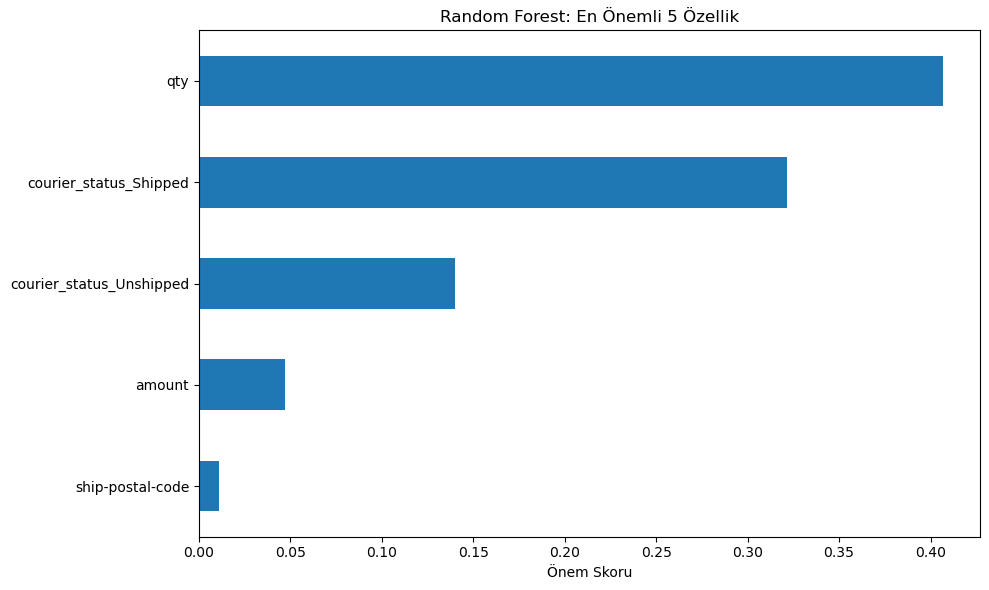

In [29]:

import matplotlib.pyplot as plt

# Özellik önem sıralamasını al
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names)

# En önemli 15 özelliği seç
top_features = feature_importances.sort_values(ascending=False).head(5)

# Grafiği çiz
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title("Random Forest: En Önemli 5 Özellik")
plt.xlabel("Önem Skoru")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


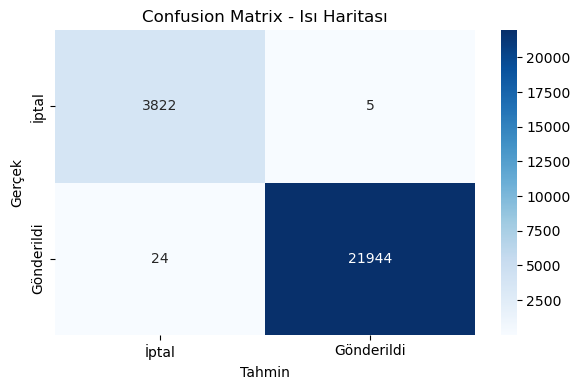

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['İptal', 'Gönderildi'], yticklabels=['İptal', 'Gönderildi'])
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix - Isı Haritası')
plt.tight_layout()
plt.show()


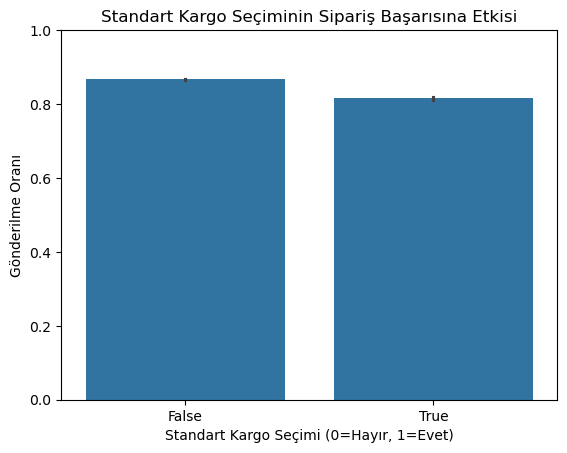

In [31]:
import seaborn as sns

# Örnek: Gönderim seviyesi ile gönderim oranı
sns.barplot(data=df, x='ship-service-level_Standard', y='status')
plt.title('Standart Kargo Seçiminin Sipariş Başarısına Etkisi')
plt.xlabel('Standart Kargo Seçimi (0=Hayır, 1=Evet)')
plt.ylabel('Gönderilme Oranı')
plt.ylim(0, 1)
plt.show()


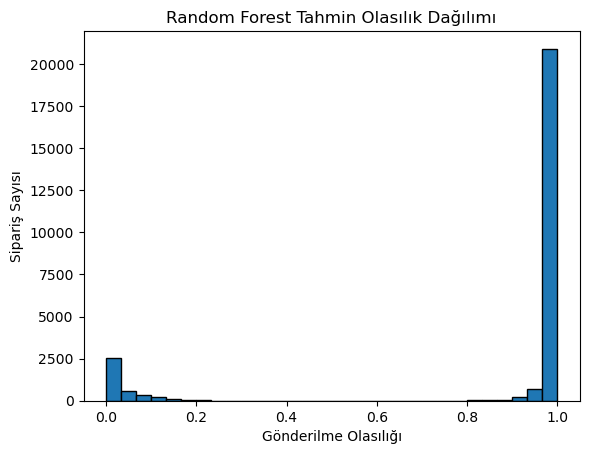

In [32]:
y_proba = model.predict_proba(X_test)[:, 1]

plt.hist(y_proba, bins=30, edgecolor='k')
plt.title('Random Forest Tahmin Olasılık Dağılımı')
plt.xlabel('Gönderilme Olasılığı')
plt.ylabel('Sipariş Sayısı')
plt.show()
